In [23]:
import pandas as pd

#timestamp = '20231115_134106'
#timestamp = '20231115_122414'
timestamp = '20231115_122730'
#timestamp = '20231115_133501'


# Directory path
directory_path = f'/home/insectvr/src/build/20231115_decisions_Data/RunData/{timestamp}/'

# Full paths for each file
file_path1 = directory_path + f'{timestamp}_ChoiceAssay_VR1_.csv'
file_path2 = directory_path + f'{timestamp}_ChoiceAssay_VR2_.csv'
file_path3 = directory_path + f'{timestamp}_ChoiceAssay_VR3_.csv'
file_path4 = directory_path + f'{timestamp}_ChoiceAssay_VR4_.csv'

# Load the files into DataFrames
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

# Display the first few rows of each DataFrame to confirm
print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())
print("\nDataFrame 3:")
print(df3.head())
print("\nDataFrame 4:")
print(df4.head())


DataFrame 1:
                        Current Time           VR  Scene  CurrentStep  \
2023-11-15 12:28:08.778          VR1  ChoiceAssay      0     0.000000   
2023-11-15 12:28:08.851          VR1  ChoiceAssay      0     0.000000   
2023-11-15 12:28:08.867          VR1  ChoiceAssay      0    -4.064818   
2023-11-15 12:28:08.884          VR1  ChoiceAssay      0    -4.171864   
2023-11-15 12:28:08.900          VR1  ChoiceAssay      0     0.000000   

                         GameObjectPosX  GameObjectPosY  GameObjectPosZ  \
2023-11-15 12:28:08.778               0        0.000000               0   
2023-11-15 12:28:08.851               0        0.000000               0   
2023-11-15 12:28:08.867               0        8.143585               0   
2023-11-15 12:28:08.884               0        8.101283               0   
2023-11-15 12:28:08.900               0        0.000000               0   

                         GameObjectRotX  GameObjectRotY  \
2023-11-15 12:28:08.778          0.000

In [27]:
len(df4)

185756

In [29]:
len(df3)

185755

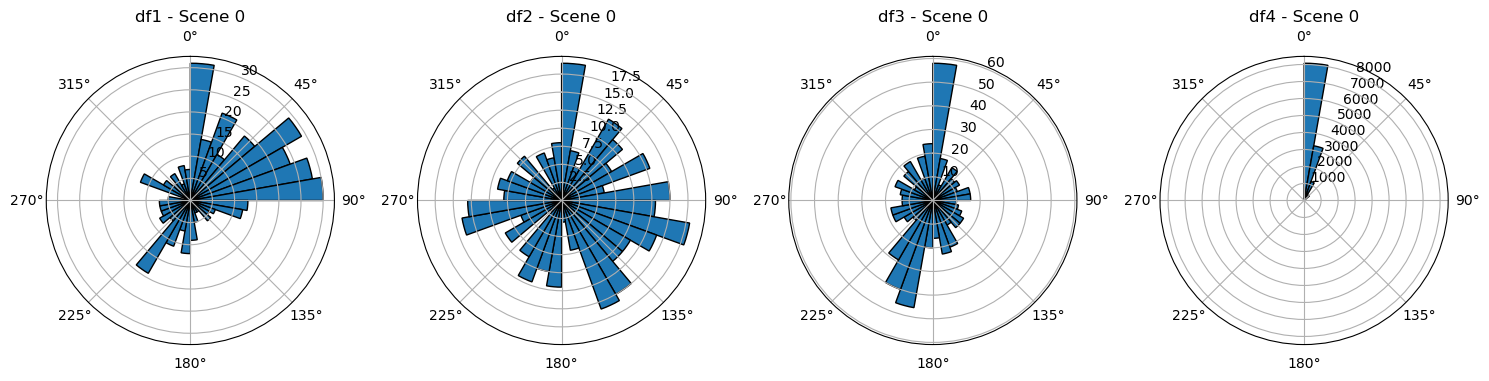

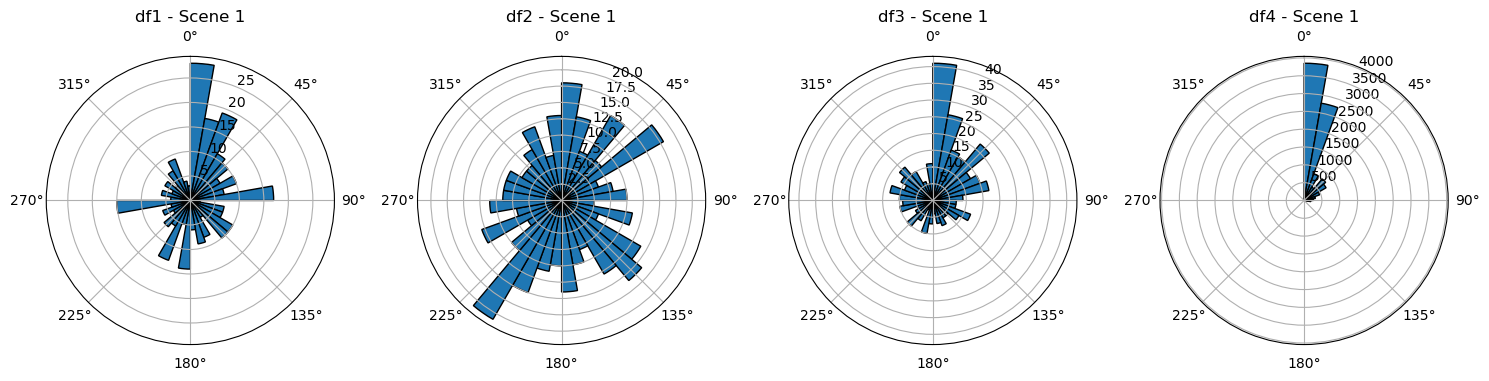

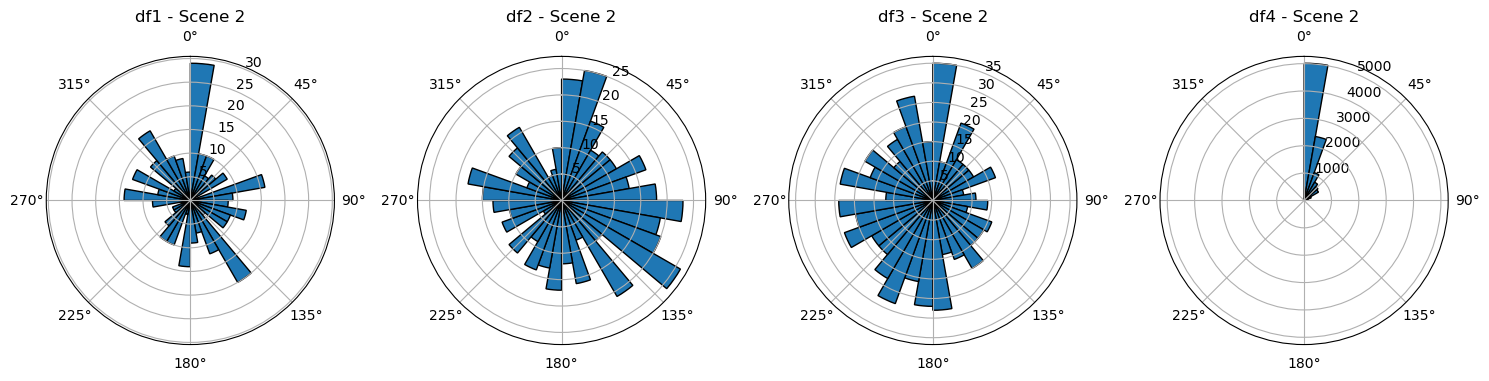

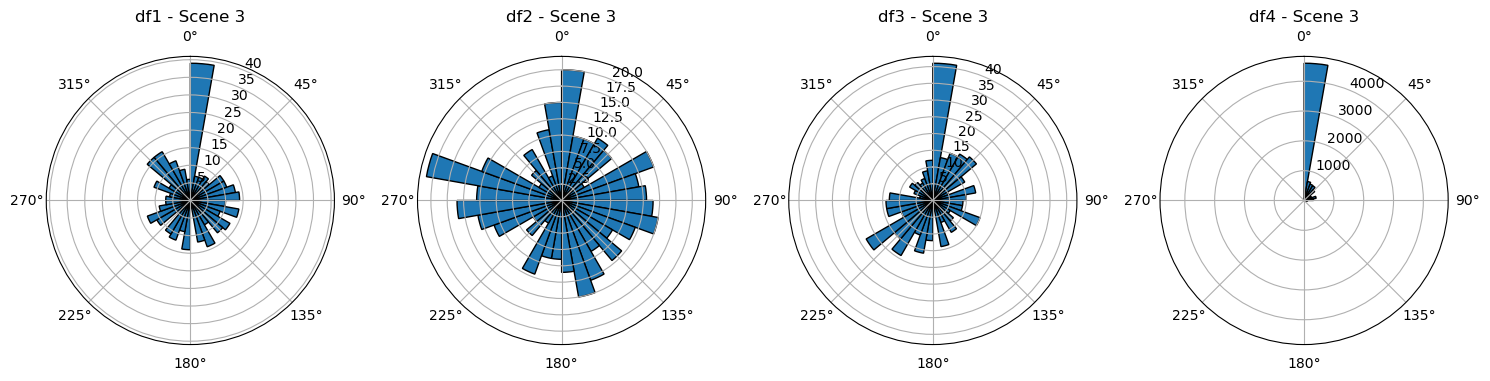

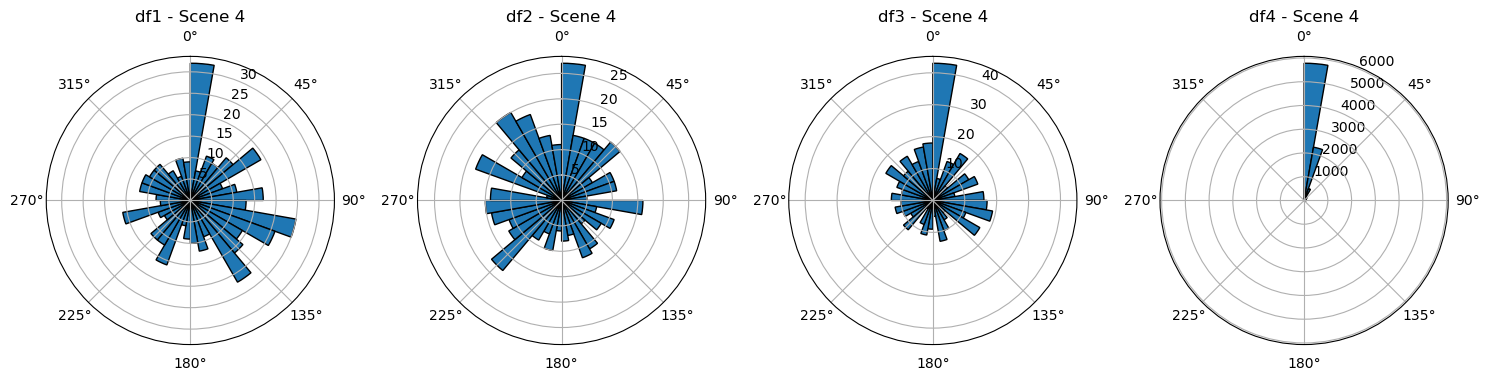

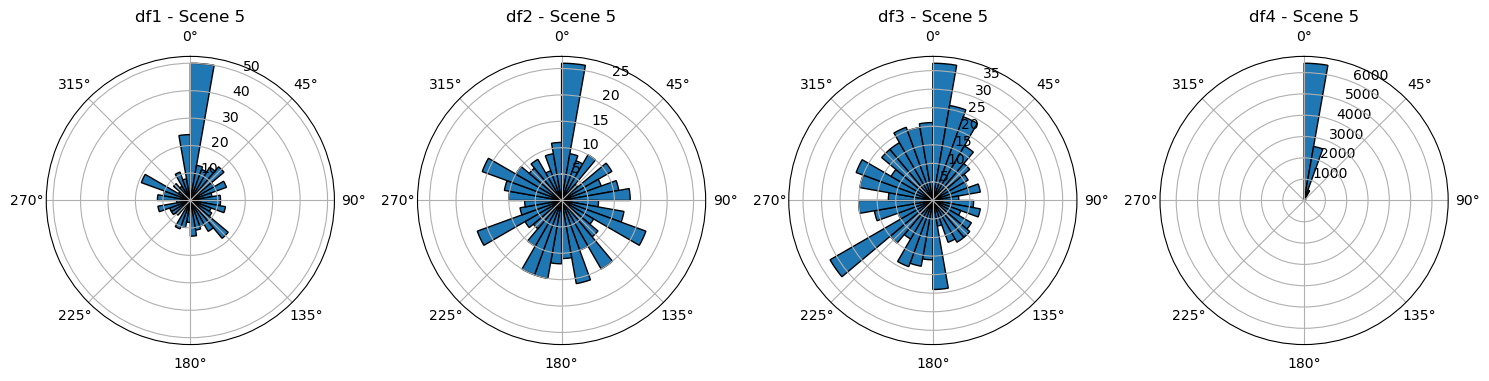

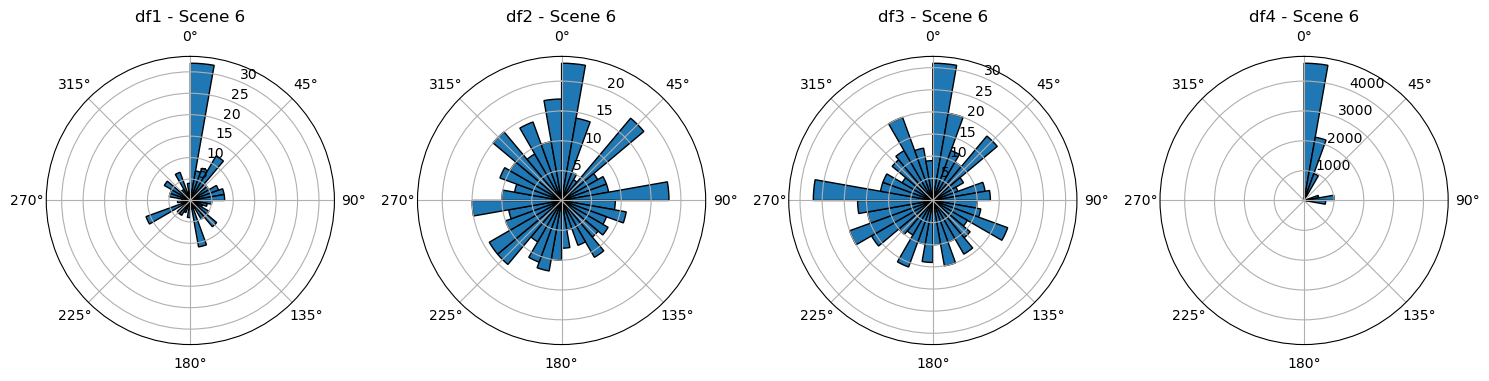

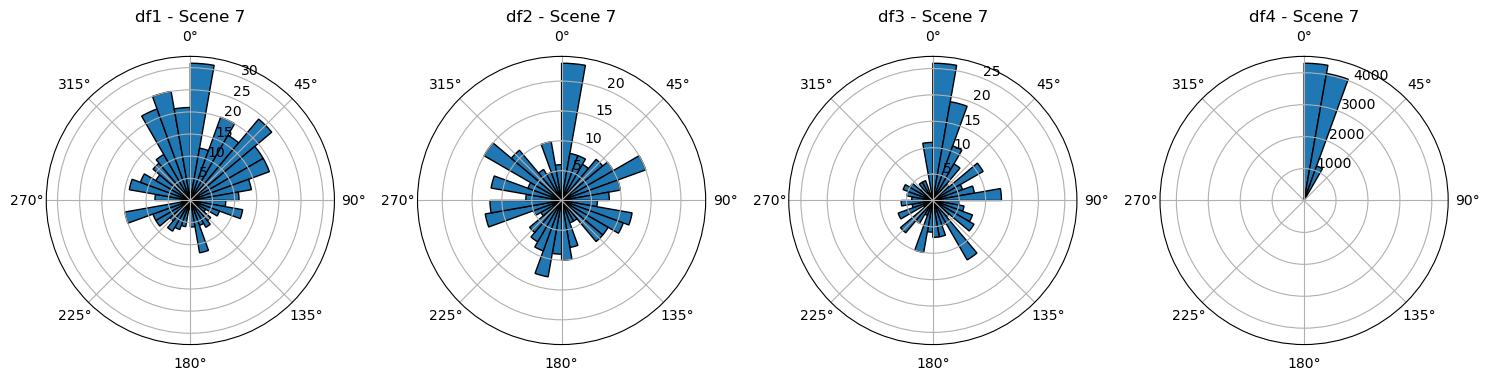

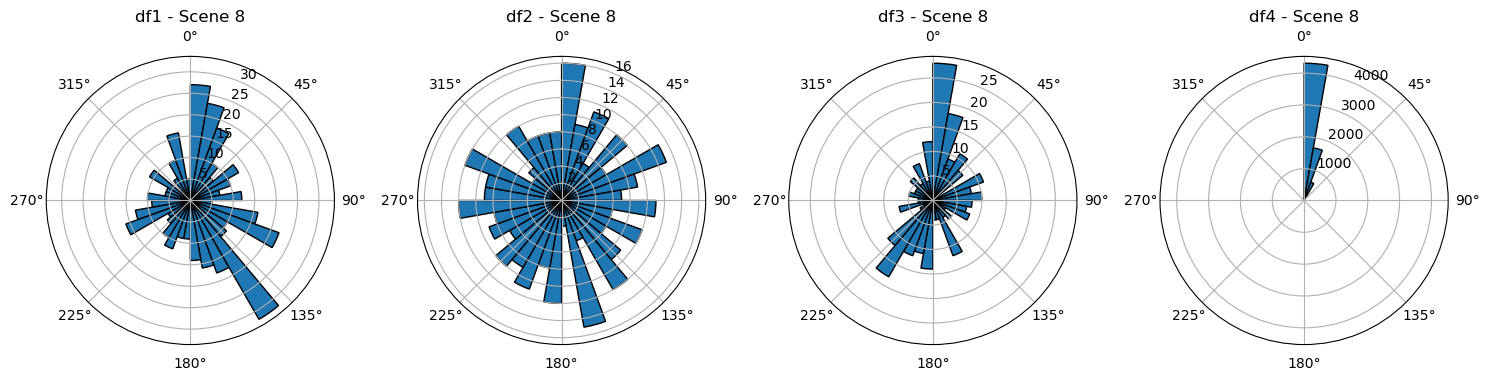

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1, df2, df3, and df4 are already loaded

# Add a column to each DataFrame to identify its source
df1['source'] = 'df1'
df2['source'] = 'df2'
df3['source'] = 'df3'
df4['source'] = 'df4'


# Combine all DataFrames into one
combined_df = pd.concat([df1, df2, df3, df4])

# Function to plot polar histograms for each DataFrame side by side
def plot_combined_polar_histograms(combined_df, scene_value):
    # Filter the DataFrame for the given scene value
    filtered_df = combined_df[combined_df['Scene'] == scene_value]
    
    # Get the unique sources
    sources = filtered_df['source'].unique()

    # Number of bins for the histogram
    num_bins = 36

    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(sources), subplot_kw=dict(polar=True), figsize=(15, 6))

    for ax, source in zip(axes, sources):
        # Filter by source
        source_df = filtered_df[filtered_df['source'] == source]

        # Extract the GameObjectRotX values
        rot_x_values = source_df['GameObjectRotX']

        # Compute histogram
        counts, bin_edges = np.histogram(rot_x_values, bins=num_bins, range=(0, 2*np.pi))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Plot the histogram
        ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], edgecolor='k')
        ax.set_title(f'{source} - Scene {scene_value}')
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)


    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage for a specific scene value
scene_values = combined_df['Scene'].unique()
for scene in scene_values:
    plot_combined_polar_histograms(combined_df, scene)


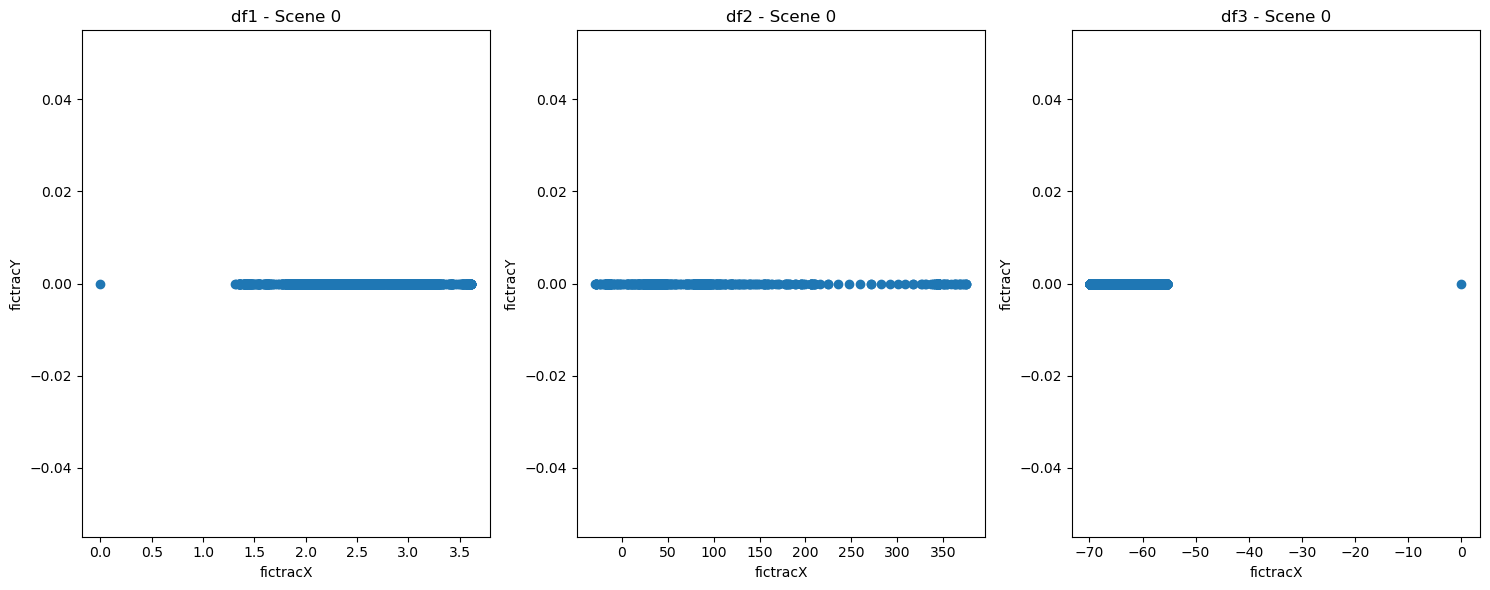

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1, df2, df3, and df4 are already loaded

# Add a column to each DataFrame to identify its source
df1['source'] = 'df1'
df2['source'] = 'df2'
df3['source'] = 'df3'


# Combine all DataFrames into one
combined_df = pd.concat([df1, df2, df3])

# Function to plot CurrentStep vs GameObjectPosY for each DataFrame
def plot_combined_steps_vs_posy(combined_df, scene_value):
    # Filter the DataFrame for the given scene value
    filtered_df = combined_df[combined_df['Scene'] == scene_value]
    
    # Get the unique sources
    sources = filtered_df['source'].unique()

    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(sources), figsize=(15, 6))

    for ax, source in zip(axes, sources):
        # Filter by source
        source_df = filtered_df[filtered_df['source'] == source]

        # Plot CurrentStep vs GameObjectPosY
        ax.scatter(source_df['SensPosY'], source_df['SensPosZ'])
        ax.set_title(f'{source} - Scene {scene_value}')
        ax.set_xlabel('fictracX')
        ax.set_ylabel('fictracY')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage for a specific scene value
scene_values = combined_df['Scene'].unique()
for scene in scene_values:
    plot_combined_steps_vs_posy(combined_df, scene)
